In [ ]:
pip install scikit-learn-extra

     |████████████████████████████████| 1.7MB 3.8MB/s 
     |████████████████████████████████| 22.3MB 1.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
import seaborn as sns
from sklearn.impute import SimpleImputer
from matplotlib import *
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


In [ ]:
data_set=pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")

In [ ]:
data_set.shape

(299, 13)

In [ ]:
data=data_set.drop("DEATH_EVENT",axis=1)

In [ ]:
data.shape

(299, 12)

In [ ]:
y = data_set.DEATH_EVENT

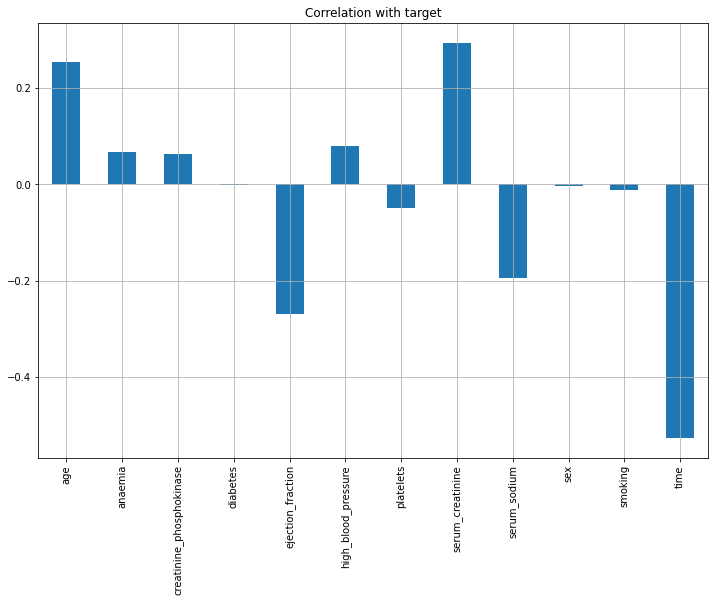

In [ ]:
data.corrwith(y).plot(kind='bar', grid=True, figsize=(12, 8), title="Correlation with target")

In [ ]:
data_iloc=data.iloc[:,[0,7]].values

In [ ]:
data_std=StandardScaler().fit_transform(data_iloc)

In [ ]:
Q1=np.percentile(data['serum_creatinine'],25,interpolation='midpoint')
Q3=np.percentile(data['serum_creatinine'],75,interpolation='midpoint')
IQR=Q3-Q1

In [ ]:
upper=np.where(data['serum_creatinine'] >= (Q3+1.5*IQR))
lower=np.where(data['serum_creatinine']<= (Q1-1.5*IQR))

In [ ]:
data.drop(upper[0],inplace=True)
data.drop(lower[0],inplace=True)
print("new shape: " , data.shape)

new shape:  (270, 12)


In [ ]:
k_medoid_cluster=KMedoids(n_clusters=2,metric="manhattan",init="random")

In [ ]:
k_medoid_cluster.fit_predict(data_iloc)

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1])

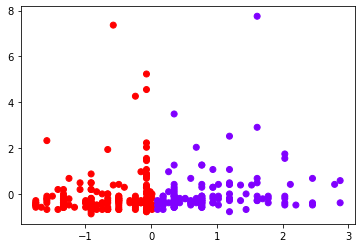

In [ ]:
plt.scatter(data_std[:,0],data_std[:,1],c=k_medoid_cluster.labels_ , cmap="rainbow")
